http://library.jsce.or.jp/jsce/open/00039/201506_no51/pdf/400.pdf

ここの再現を行う．

In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

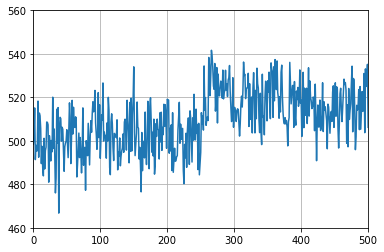

In [56]:
# dataset 1 の作成
def make_dataset_1():
    r"""ARMA モデルにしたがって時系列データ $x_t$ を発生させる．

    $$
    z_t = \alpha z_{t-1} + \epsilon_t + \beta \epsilon_{t-1}
    \\
    x_t = z_t + \mu_t
    $$

    ただし $z_0 = 0, \epsilon_0 = 0$ とした．

    Returns
    -------
    x_t: 長さ 501 の信号
    """
    def get_mu(time):
        if time == 150:
            return 535
        if time > 250:
            return 520
        else:
            return 500

    T = 501
    x = np.zeros(T)
    z_t = 0.0
    eps_t = np.random.normal(0, 10)
    alpha = 0.8
    beta = -0.6

    # if t = 0
    z_t = eps_t
    x[0] = z_t + get_mu(0)
    # otherwise
    for t in range(1, T):
        z_t = alpha * z_t
        z_t += beta * eps_t
        eps_t = np.random.normal(0, 10)
        z_t += eps_t

        x[t] = z_t + get_mu(t)

    return x

data1 = make_dataset_1()

plt.plot(data1)
plt.ylim(460, 560)
plt.xlim(0, 500)
plt.grid()
plt.show()

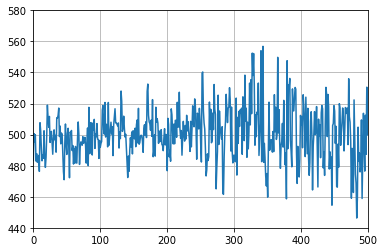

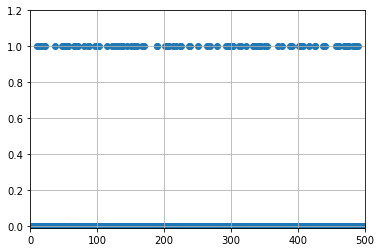

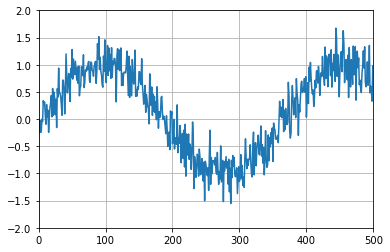

In [61]:
# dataset 2 の作成
def make_dataset_2():
    r"""ARMAX モデルにしたがって時系列データ $x_t$ を発生させる．

    $$
    z_t = \alpha z_{t-1} + \epsilon_t + \beta \epsilon_{t-1}
    \\
    x_t = z_t + \mu + \gamma_1 \xi_{1t} + \gamma_2 \xi_{2t}
    $$

    Returns
    -------
    x: 長さ 501 の信号
    xi_1: 1 つ目の外生変数 (0 or 1)
    xi_2: 2 つ目の外生変数
    """
    def get_sigma(t):
        if t > 250:
            return 20
        else:
            return 10

    T = 501
    x = np.zeros(T)
    mu = 500
    alpha = 0.8
    beta = -0.6
    gamma_1 = 6.0
    gamma_2 = -4.0

    xi_1 = stats.bernoulli.rvs(0.2, size=T)
    xi_2 = np.sin(0.017 * np.arange(T)) + np.random.normal(0, 0.25, size=T)

    # if t = 0
    eps_t = np.random.normal(0, get_sigma(0))
    z_t = eps_t
    x[0] = z_t + mu + gamma_1 * xi_1[0] + gamma_2 * xi_2[0]
    # otherwise
    for t in range(1, T):
        z_t = alpha * z_t
        z_t += beta * eps_t
        eps_t = np.random.normal(0, get_sigma(t))
        z_t += eps_t

        x[t] = z_t + mu + gamma_1 * xi_1[t] + gamma_2 * xi_2[t]

    return x, xi_1, xi_2

data2, xi1, xi2 = make_dataset_2()
plt.plot(data2)
plt.xlim(0, 500)
plt.ylim(440, 580)
plt.grid()
plt.show()
plt.scatter(np.arange(len(xi1)), xi1)
plt.xlim(0, 500)
plt.ylim(-0.01, 1.2)
plt.grid()
plt.show()
plt.plot(xi2)
plt.xlim(0, 500)
plt.ylim(-2, 2)
plt.grid()
plt.show()